In [1]:
url='http://www.cgeh.nl/sites/default/files/Conflict%20Catalog%2018%20vars.xls'

In [2]:
import pandas as pd
import xlrd

In [3]:
df= pd.read_excel(url, error_bad_lines=False)
df.head()

,Common Name,Name,CountryCode,NumberActors,MilFatalities,TotalFatalities,StartYear,StartMonth,StartDay,EndYear,EndMonth,EndDay,Region,Century,Decade,DurationD,DurationM,DurationY
0,NaN,"England (Henry IV vs Richard II), 1400",NaN,2.0,NaN,NaN,1400,1.0,NaN,1400.0,2.0,NaN,3,1,140,NaN,1.0,0.0
1,NaN,"England-Scotland, 1400-02",NaN,2.0,NaN,NaN,1400,NaN,NaN,1402.0,NaN,NaN,3,1,140,NaN,NaN,2.0
2,NaN,"Mongols (Timur)-Georgia, 1400",NaN,2.0,NaN,NaN,1400,NaN,NaN,1400.0,NaN,NaN,4,1,140,NaN,NaN,0.0
3,NaN,"Mongols (Timur)-Turkey, 1400",NaN,2.0,NaN,NaN,1400,8.0,NaN,1400.0,9.0,NaN,4,1,140,NaN,1.0,0.0
4,NaN,"Mongols (Timur)-Egypt, Syria (Burji Mamluks), ...",NaN,3.0,NaN,NaN,1400,10.0,NaN,1401.0,2.0,NaN,5,1,140,NaN,4.0,1.0


In [4]:
#1 Exploratory Data Analysis

In [5]:
df.shape

(3708, 18)

In [6]:
#"Who was on each side in > 2 participant conflicts (separated by hyphens)

In [7]:
variable_split = df['Name'].str.split('-')

In [8]:
type(variable_split[0])

list

In [9]:
df['Country 1']=variable_split.str.get(0)
df['Country 2']=variable_split.str.get(1)

In [10]:
df['NumberActors'].value_counts()

2.0     2978
3.0      398
4.0      183
5.0       50
6.0       22
7.0       13
9.0        6
10.0       5
8.0        5
31.0       2
20.0       1
17.0       1
Name: NumberActors, dtype: int64

In [11]:
x=(2978)/3708
x*100

80.31283710895362

In [12]:
df.drop(df.loc[df['NumberActors']>2].index, inplace=True)

In [13]:
df.shape

(3022, 20)

In [14]:
df.head()

,Common Name,Name,CountryCode,NumberActors,MilFatalities,TotalFatalities,StartYear,StartMonth,StartDay,EndYear,EndMonth,EndDay,Region,Century,Decade,DurationD,DurationM,DurationY,Country 1,Country 2
0,NaN,"England (Henry IV vs Richard II), 1400",NaN,2.0,NaN,NaN,1400,1.0,NaN,1400.0,2.0,NaN,3,1,140,NaN,1.0,0.0,"England (Henry IV vs Richard II), 1400",NaN
1,NaN,"England-Scotland, 1400-02",NaN,2.0,NaN,NaN,1400,NaN,NaN,1402.0,NaN,NaN,3,1,140,NaN,NaN,2.0,England,"Scotland, 1400"
2,NaN,"Mongols (Timur)-Georgia, 1400",NaN,2.0,NaN,NaN,1400,NaN,NaN,1400.0,NaN,NaN,4,1,140,NaN,NaN,0.0,Mongols (Timur),"Georgia, 1400"
3,NaN,"Mongols (Timur)-Turkey, 1400",NaN,2.0,NaN,NaN,1400,8.0,NaN,1400.0,9.0,NaN,4,1,140,NaN,1.0,0.0,Mongols (Timur),"Turkey, 1400"
5,NaN,"China (minority in Hebei, Shandong, Anhui, Jia...",710.0,2.0,NaN,10000.0,1400,NaN,NaN,1402.0,NaN,NaN,12,1,140,NaN,NaN,2.0,"China (minority in Hebei, Shandong, Anhui, Jia...",02


In [15]:
df['Country 1'].value_counts().to_frame()

,Country 1
France,127
Russia,124
Britain,122
China,94
Turkey,91
...,...
"England (Scotland), 1689",1
"Indonesia (Ambon), 1999",1
"Egypt, 1992",1
"Paraguay, 1947",1


In [16]:
df['Country 2'].value_counts().to_frame()

,Country 2
,20
79,11
68,11
12,11
93,10
...,...
"Russia (Astrakhan), 1568",1
"Portugal (Ngola, Angola), 1744",1
"Algiers, 1827",1
"Japanese pirates (Zhejiang), 1409",1


In [17]:
df.shape

(3022, 20)

In [18]:
df.drop(columns=['Common Name',
         'CountryCode',
         'MilFatalities',
         'StartMonth',
         'StartDay',
         'EndMonth',
         'EndDay',
         'DurationD',
         'DurationM'], 
        axis=1, inplace=True)

In [19]:
df.head()

,Name,NumberActors,TotalFatalities,StartYear,EndYear,Region,Century,Decade,DurationY,Country 1,Country 2
0,"England (Henry IV vs Richard II), 1400",2.0,NaN,1400,1400.0,3,1,140,0.0,"England (Henry IV vs Richard II), 1400",NaN
1,"England-Scotland, 1400-02",2.0,NaN,1400,1402.0,3,1,140,2.0,England,"Scotland, 1400"
2,"Mongols (Timur)-Georgia, 1400",2.0,NaN,1400,1400.0,4,1,140,0.0,Mongols (Timur),"Georgia, 1400"
3,"Mongols (Timur)-Turkey, 1400",2.0,NaN,1400,1400.0,4,1,140,0.0,Mongols (Timur),"Turkey, 1400"
5,"China (minority in Hebei, Shandong, Anhui, Jia...",2.0,10000.0,1400,1402.0,12,1,140,2.0,"China (minority in Hebei, Shandong, Anhui, Jia...",02


1. North America, Central America, and the Caribbean
2. South America
3. Europe west of 15 degrees east longitude plus Sweden and Italy
4. Europe east of 15 degrees east longitude (includes Caucusus region)
5. Middle East (Iran west to Syria and Arabian peninsula)
6. North Africa (Egypt to Morocco and Mauritania east to Sudan)
7
7. West & Central Africa (Senegal to Congo)
8. East & South Africa (Ethiopia to Zambia to Angola and south)
9. Central Asia (former Soviet republics, Siberia, and Mongolia)
10. South Asia (Afghanistan and Indian subcontinent)
11. Southeast Asia (Burma to Australia and Pacific islands)
12. East Asia (China, Korea, Japan

In [20]:
df['Region'].replace(
    {1 : 'North & Central America',
    2: 'South America',
    3: 'Western Europe',
    4: 'Eastern Europe',
    5: 'Middle East' ,
    6: 'North Africa',
    7: 'West & Central Africa',
    8: 'East & South Africa' ,
    9: 'Central Asia',
    10: 'South Asia',
    11: 'Southeast Asia',
    12: 'East Asia' 
    }, inplace=True)

In [21]:
df.tail()

,Name,NumberActors,TotalFatalities,StartYear,EndYear,Region,Century,Decade,DurationY,Country 1,Country 2
3703,"Indonesia (East Timor), 1999",2.0,7000.0,1999,1999.0,Southeast Asia,6,199,0.0,"Indonesia (East Timor), 1999",NaN
3704,"India, 1999",2.0,44.0,1999,1999.0,South Asia,6,199,0.0,"India, 1999",NaN
3705,"Indonesia (Celebes, Christians vs Muslims), 1999",2.0,1300.0,1999,NaN,Southeast Asia,6,199,NaN,"Indonesia (Celebes, Christians vs Muslims), 1999",NaN
3706,"Nigeria (Muslim vs Christian, Hausa vs Ibo), 2000",2.0,NaN,2000,NaN,West & Central Africa,7,200,NaN,"Nigeria (Muslim vs Christian, Hausa vs Ibo), 2000",NaN
3707,"Israel-Palestine, 2000",2.0,NaN,2000,NaN,Middle East,7,200,NaN,Israel,"Palestine, 2000"


In [22]:
df['Decade']=df['Decade']*10
df['Century']=1300+df['Century']*100
df.head()

,Name,NumberActors,TotalFatalities,StartYear,EndYear,Region,Century,Decade,DurationY,Country 1,Country 2
0,"England (Henry IV vs Richard II), 1400",2.0,NaN,1400,1400.0,Western Europe,1400,1400,0.0,"England (Henry IV vs Richard II), 1400",NaN
1,"England-Scotland, 1400-02",2.0,NaN,1400,1402.0,Western Europe,1400,1400,2.0,England,"Scotland, 1400"
2,"Mongols (Timur)-Georgia, 1400",2.0,NaN,1400,1400.0,Eastern Europe,1400,1400,0.0,Mongols (Timur),"Georgia, 1400"
3,"Mongols (Timur)-Turkey, 1400",2.0,NaN,1400,1400.0,Eastern Europe,1400,1400,0.0,Mongols (Timur),"Turkey, 1400"
5,"China (minority in Hebei, Shandong, Anhui, Jia...",2.0,10000.0,1400,1402.0,East Asia,1400,1400,2.0,"China (minority in Hebei, Shandong, Anhui, Jia...",02


In [23]:
df2=df['Region'].value_counts().to_frame()
df2

,Region
East Asia,486
Western Europe,448
Eastern Europe,419
East & South Africa,333
West & Central Africa,259
North Africa,189
South Asia,180
Southeast Asia,163
North & Central America,150
Middle East,134


In [24]:
import matplotlib.pyplot as plt

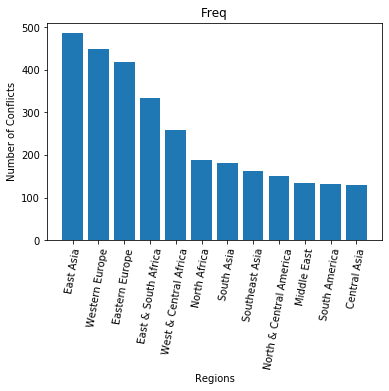

In [25]:
#bar graph
plt.bar(df2.index,df2['Region'])

#xticks 
plt.xticks(rotation=80) 

#x-axis labels 
plt.xlabel('Regions') 

#y-axis labels 
plt.ylabel('Number of Conflicts') 

#plot title 
plt.title('Freq') 

#display 
plt.show()

In [26]:
df3 = df['Decade'].value_counts().to_frame().sort_index()
df3.tail()

,Decade
1960,91
1970,47
1980,63
1990,61
2000,2


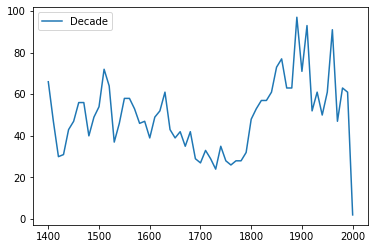

In [27]:
df3.plot()
plt.show()

In [28]:
df4 = df[['Region','Decade']]
df4.head()

,Region,Decade
0,Western Europe,1400
1,Western Europe,1400
2,Eastern Europe,1400
3,Eastern Europe,1400
5,East Asia,1400


In [29]:
df5=pd.crosstab(index=df4['Decade'], columns=df4['Region'])
df5.head()

Region,Central Asia,East & South Africa,East Asia,Eastern Europe,Middle East,North & Central America,North Africa,South America,South Asia,Southeast Asia,West & Central Africa,Western Europe
Decade,,,,,,,,,,,,
1400,3,0,13,13,2,0,2,0,2,7,0,24
1410,1,2,19,1,0,0,3,0,3,3,0,15
1420,1,3,12,5,0,0,0,0,1,1,0,7
1430,0,1,13,7,1,0,2,0,0,1,0,6
1440,0,0,16,12,0,1,0,0,1,0,0,13


In [30]:
#df4['Total']=df4['Central Asia']+df4['East & South Africa'] +df4['East Asia'] +df4['Eastern Europe']+df4['Middle East']+df4['North & Central America']+df4['North Africa']+df4['South America']+df4['South Asia']+df4['Southeast Asia'] +df4['West & Central Africa']+df4['Western Europe']

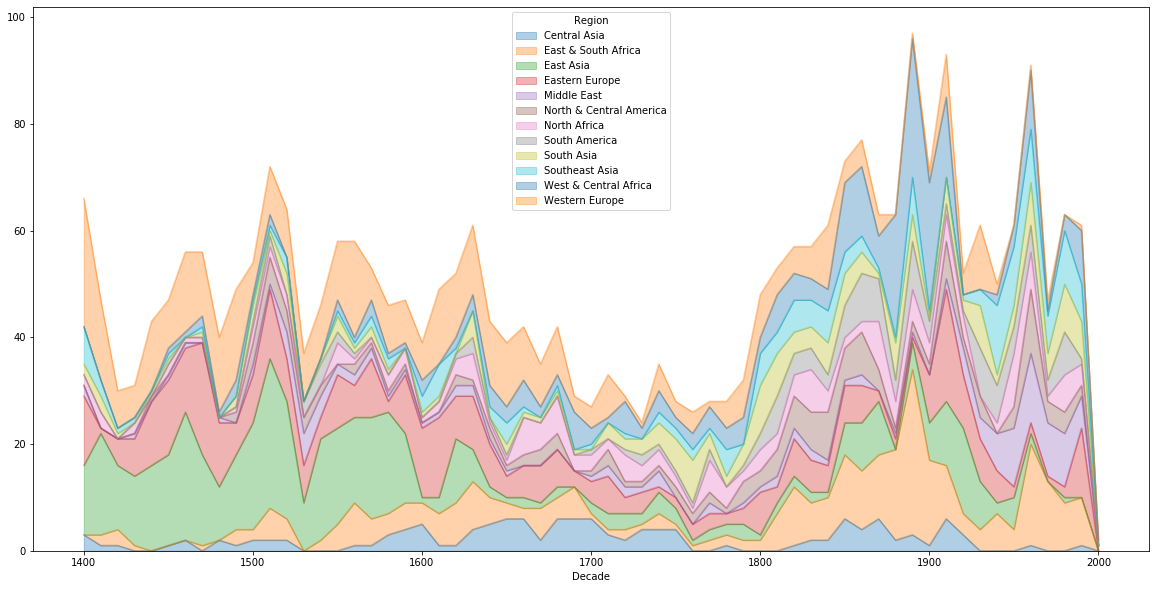

In [31]:
ax = df5.plot(kind='area', alpha=0.35, figsize=(20, 10),stacked=True)

In [63]:
df6 = df[['Region','Century']]
df6=pd.crosstab(index=df6['Century'], columns=df6['Region'])
df6=df6.drop(index=2000)

In [41]:
import numpy as np; 
import seaborn as sns; 

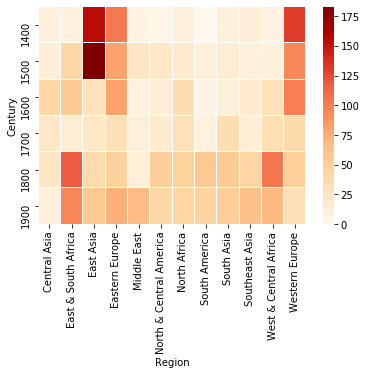

In [64]:
ax = sns.heatmap(df6, linewidths=.1,cmap="OrRd")